In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

In [2]:
# Function to create a dataset of a circle at a given point
def create_circle(c=np.array([0.0, 0.0]), r=1.0, noise=0.0, n=20):
    delta = 2.0*np.pi / n
    theta = np.linspace(0.0, 2.0*np.pi, num=n, endpoint=False)
    c = np.array(c)
    
    x = c[0] + r*np.cos(theta) + np.random.normal(scale=noise, size=theta.shape)
    y = c[1] + r*np.sin(theta) + np.random.normal(scale=noise, size=theta.shape)
    return np.array([x, y]).T

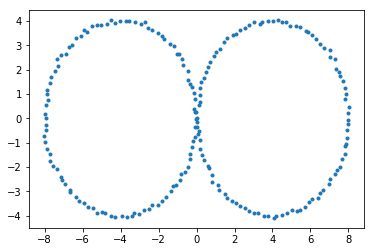

In [3]:
# Create and show two circles with some noise
circ1 = create_circle(c=[-4.0, 0.0], r=4.0, noise=0.05, n=100)
circ2 = create_circle(c=[4.0, 0.0], r=4.0, noise=0.05, n=100)
dataset = np.concatenate((circ1, circ2))
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [40]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
f_x = filt(dataset)
cover = pythd.cover.IntervalCover1D.EvenlySpacedFromValues(f_x, 8, 0.5)
clustering = pythd.clustering.HierarchicalClustering()

In [41]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)

In [42]:
# Create igraph graph
g = res.get_igraph_network()
print(g)

IGRAPH UN-- 50 28 --
+ attr: name (v), points (v)
+ edges (vertex names):
0--1, 0--2, 0--3, 1--48, 1--49, 2--5, 3--4, 4--6, 5--6, 7--47, 8--47, 9--47,
10--47, 11--47, 12--47, 13--47, 14--47, 15--47, 34--47, 39--46, 40--46,
41--46, 42--46, 43--46, 44--46, 45--46, 46--48, 47--49


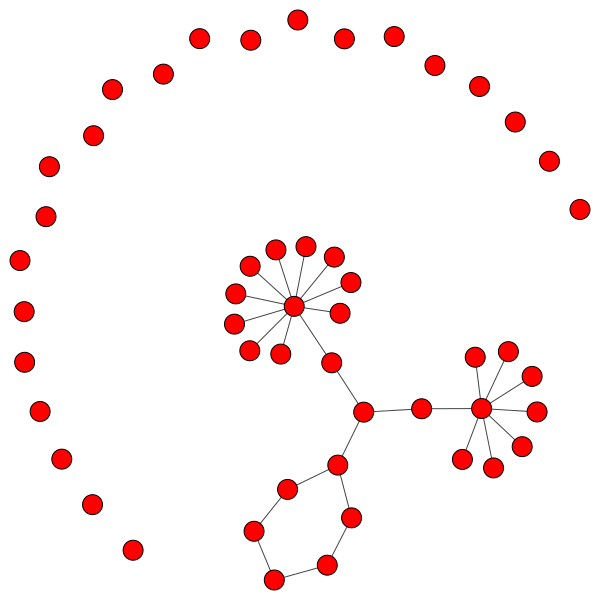

In [43]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)

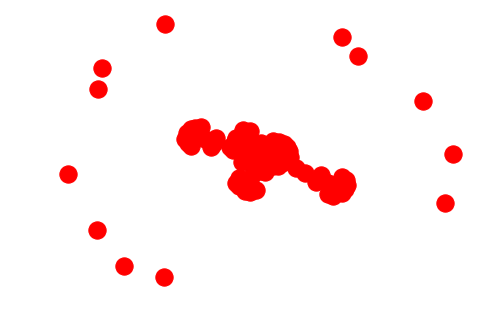

In [29]:
# Visualize with networkx
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

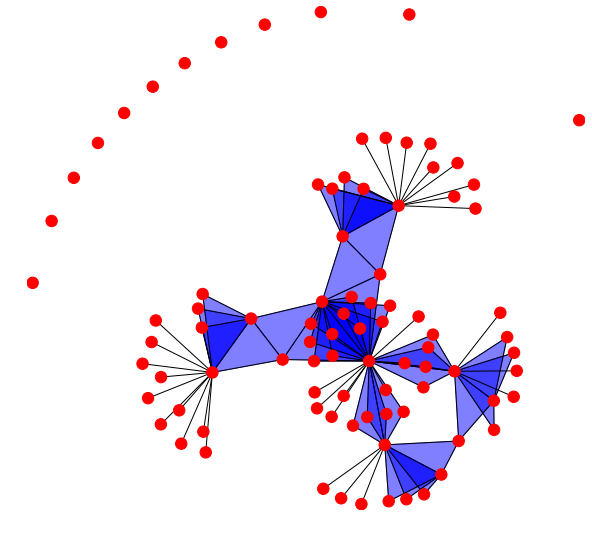

In [31]:
from importlib import reload
import pythd.plotting as plot
reload(plot)
plot.draw_2_skeleton(res.compute_k_skeleton(k=2), layout)